In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [2]:
CSV = "/media/marsdenlab/Data1/UQ/0110/csv/bif_unsteady.csv"

df = pd.read_csv(CSV)
print(df.columns)

Index(['Unnamed: 0', 'generation', 'mesh', 'model', 'pressure_00005_0',
       'pressure_00010_0', 'pressure_00015_0', 'pressure_00020_0',
       'pressure_00025_0', 'pressure_00030_0',
       ...
       'velocity_01490_2', 'velocity_01495_0', 'velocity_01495_1',
       'velocity_01495_2', 'velocity_01500_0', 'velocity_01500_1',
       'velocity_01500_2', 'x', 'y', 'z'],
      dtype='object', length=2107)


In [17]:
quant    = "pressure"
component = "0"
q_start  = 5
q_end    = 1500
incr     = 5
q_labels = []
dt       = 0.02
times    = np.arange(q_start,q_end+incr,step=incr)*dt

generation = 1
model      = 9
mesh       = "coarse"
vals       = []

for i in range(q_start,q_end+incr,incr):
    l = str(i)
    l = quant+"_"+"0"*(5-len(l))+l+"_"+component
    q_labels.append(l)
    
    d = df.loc[( df["mesh"]==mesh ) &\
               (df["generation"]==generation) &\
               (df["model"]==model)][l].values[0]
    
    vals.append(d)

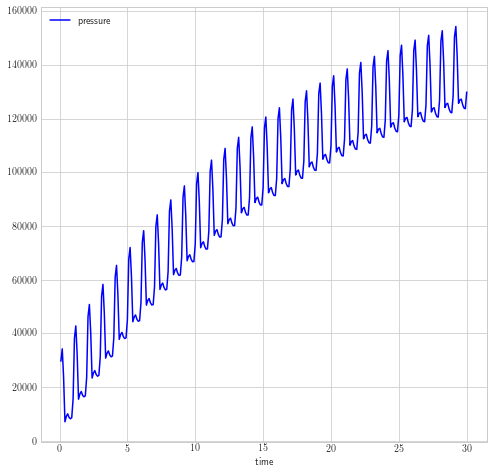

In [18]:
plt.figure(figsize=(8,8))
plt.plot(times,vals, label=quant, color='b')
plt.xlabel("time")
plt.legend()
    
#plt.savefig(OUT_DIR+'/'+CSV_FILE+'_'+label+str(c)+'.png',dpi=300)
plt.show()